<a href="https://colab.research.google.com/github/nancy19-tech/Twitter-Sentimental-Analysis/blob/main/twitter_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing kaggle library
! pip install kaggle

Upload Kaggle .json file


In [7]:
#configuring the path of .json file
!mkdir  -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Twitter Sentiment Analysis dataset


In [8]:
#API to fecth the datatset from kaggle
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
#extracting the compressed datatset

from zipfile import ZipFile
dataset='/content/sentiment140.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print(' The dataset is extracted')

 The dataset is extracted


Importing the dependencies

In [10]:
import numpy as np
import pandas as pd
import re  # regular expression for matching patterns
from nltk.corpus import stopwords  # importing natural language toolkit
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer  # converting textual data into numbers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report


In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
#printing the stopwords in english
print(stopwords.words('english'))#stopwords are those word that does not hold that much contextual importance
# removing stopwords will reduce the dataset.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
#loading the data from csv file to pandas dataframe
twitter_data=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1')

In [15]:
#CHECKING the number of rows and cols
twitter_data.shape

(1599999, 6)

In [16]:
twitter_data.head() #in this the first tweet is getting read as the column names.

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [18]:
#naming the names of column and reading dataset again
columns_names=['target','id','date','flag','user','text']
twitter_data=pd.read_csv('/content/training.1600000.processed.noemoticon.csv',names=columns_names,encoding='ISO-8859-1')

In [19]:
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [20]:
twitter_data.shape

(1600000, 6)

In [21]:
twitter_data.isnull().sum()

,0
target,0
id,0
date,0
flag,0
user,0
text,0


There are no null values in this dataset.

In [22]:
#checking the distribution of target column
twitter_data['target'].value_counts()

,count
target,
0,800000
4,800000


It means they have equal distribution of negative and positive tweets.

In [23]:
#converting target 4 to 1 for better readablility
twitter_data.replace({'target':{4:1}},inplace=True) # inplace=Truee means that we are updating the changes in datatset too

This Machine Learning model will understand 0 as negative tweet and 1 as positive tweet




In [24]:
twitter_data['target'].value_counts()

,count
target,
0,800000
1,800000


# **DATA VISUALIZATION**

### **Distribution of Sentiments**

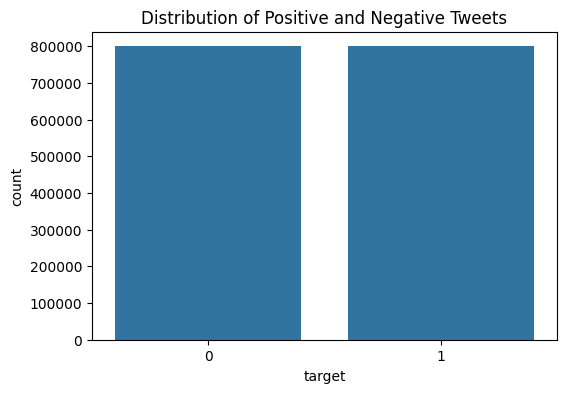

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the distribution of target column
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=twitter_data)
plt.title('Distribution of Positive and Negative Tweets')
plt.show()

The plot depicts the equal number of instances in the target column. We can also conclude this by using a pie plot.

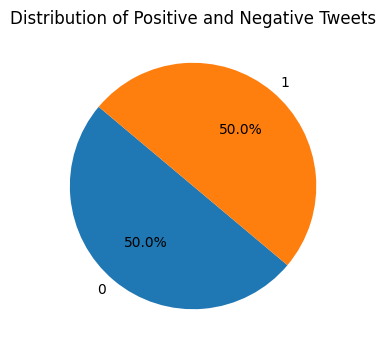

In [26]:
Y = twitter_data['target'].values

# Plotting the distribution of target column as a pie plot.
plt.figure(figsize=(6, 4))
class_counts = pd.Series(Y).value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Positive and Negative Tweets')
plt.show()


Hence, we have a balanced dataset.

### **Sentiment Over Time**

Visualizing how sentiments change over time.



<ipython-input-27-353b42ac1e3d>:4: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  twitter_data['date'] = pd.to_datetime(twitter_data['date'])


<Figure size 1200x600 with 0 Axes>

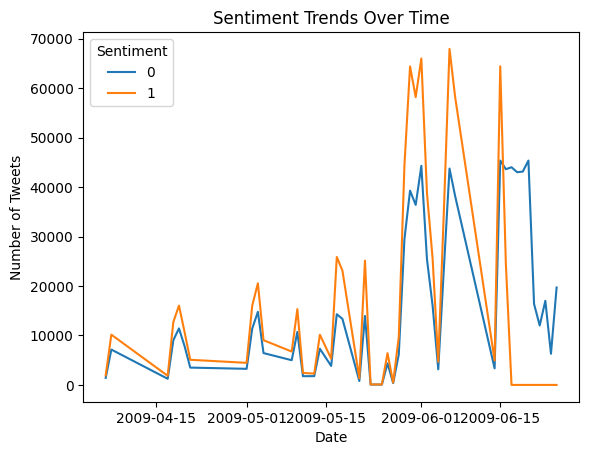

In [27]:
import pandas as pd


twitter_data['date'] = pd.to_datetime(twitter_data['date'])


sentiment_time_series = twitter_data.groupby([twitter_data['date'].dt.date, 'target']).size().unstack().fillna(0)

# Plotting the time series
plt.figure(figsize=(12, 6))
sentiment_time_series.plot()
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.show()


### **Word Clouds for Positive and Negative Tweets**

Creating word clouds to visualize the most common words in positive and negative tweets.

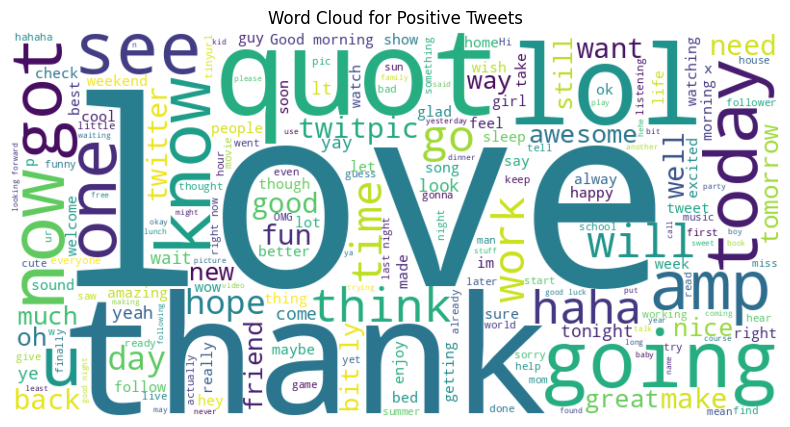

In [30]:
from wordcloud import WordCloud

# Generate word clouds
positive_tweets = ' '.join(twitter_data[twitter_data['target'] == 1]['text'])
negative_tweets = ' '.join(twitter_data[twitter_data['target'] == 0]['text'])

# Positive word cloud
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()


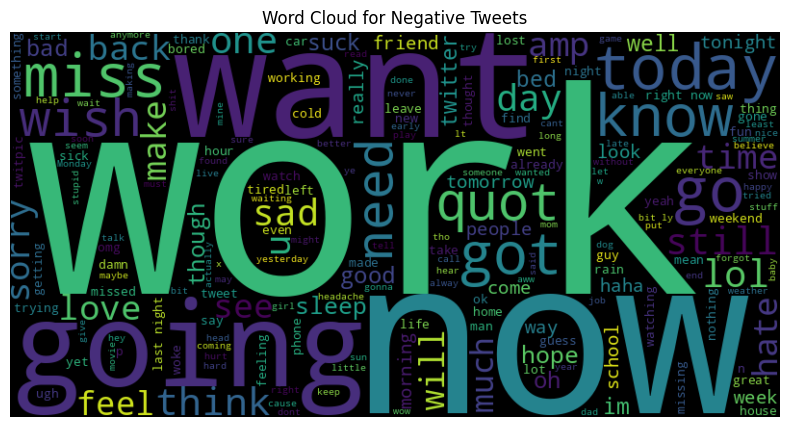

In [31]:
# Negative word cloud
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()


### **Sentiment by Flag**

Comparing the sentiment distribution based on flagged tweets.

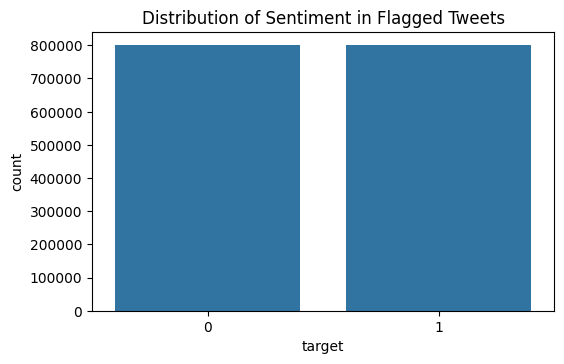

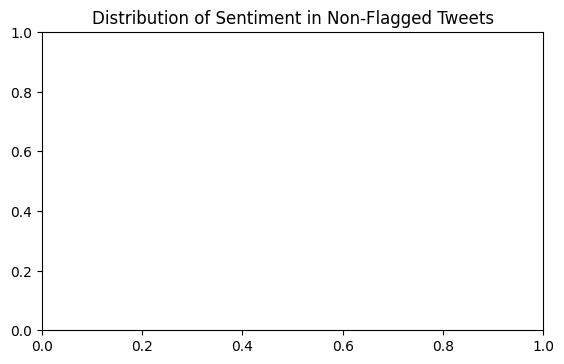

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of sentiments in flagged tweets
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=twitter_data[twitter_data['flag'] != '0'])
plt.title('Distribution of Sentiment in Flagged Tweets')
plt.tight_layout(pad=2.0)  # Add padding between plots
plt.show()

# Distribution of sentiments in non-flagged tweets
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=twitter_data[twitter_data['flag'] == '0'])
plt.title('Distribution of Sentiment in Non-Flagged Tweets')
plt.tight_layout(pad=2.0)  # Add padding between plots
plt.show()



### **Top Users by Sentiment**

Identifying the users with the most positive or negative tweets.

<ipython-input-33-d0bd8fc983cb>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_positive_users.values, y=top_positive_users.index, palette='viridis')


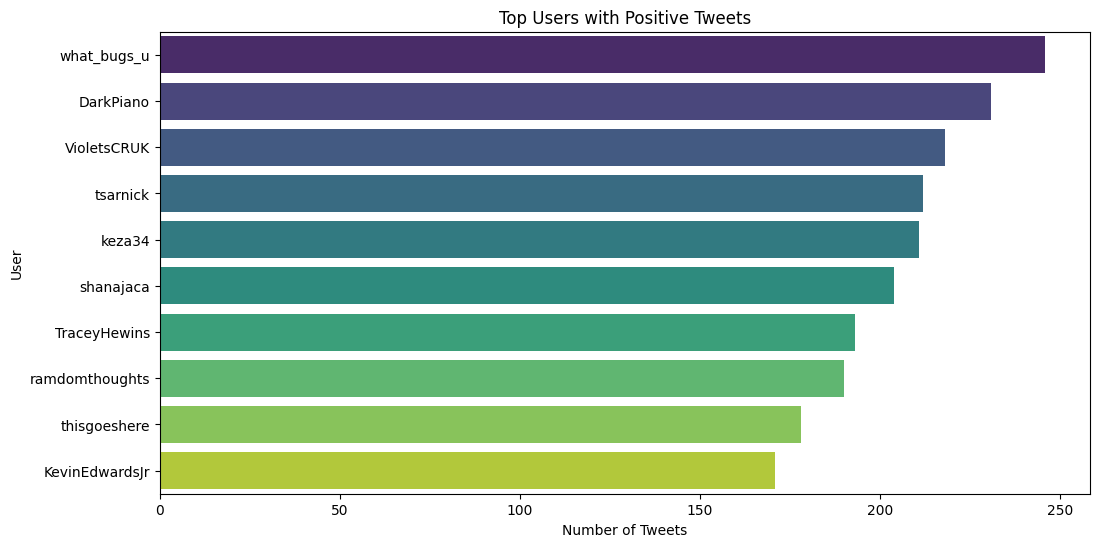

In [33]:
# Top users with positive tweets
top_positive_users = twitter_data[twitter_data['target'] == 1]['user'].value_counts().head(10)
top_negative_users = twitter_data[twitter_data['target'] == 0]['user'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_positive_users.values, y=top_positive_users.index, palette='viridis')
plt.title('Top Users with Positive Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('User')
plt.show()




<ipython-input-34-1948746a418b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_negative_users.values, y=top_negative_users.index, palette='magma')


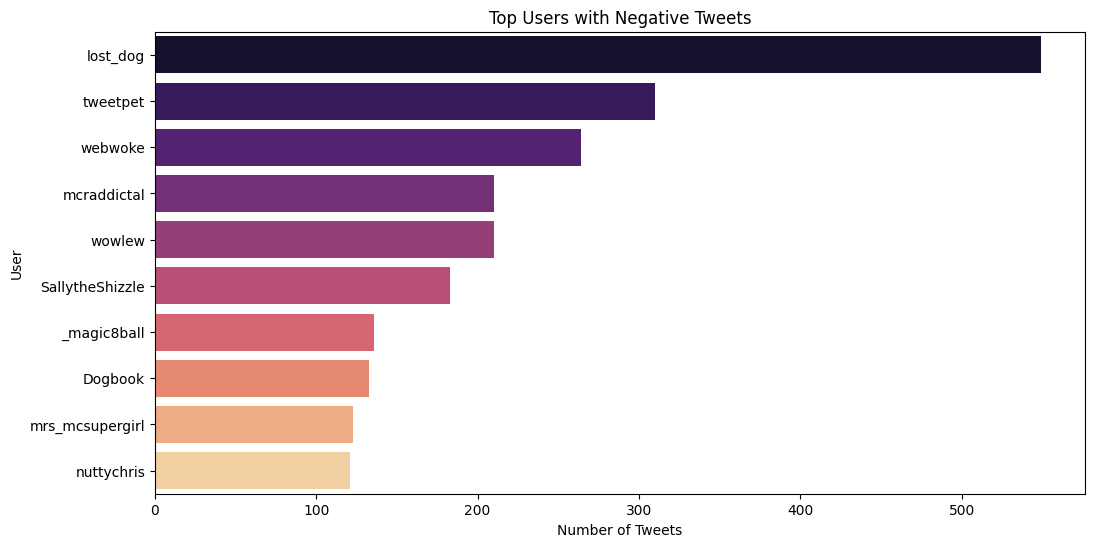

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_negative_users.values, y=top_negative_users.index, palette='magma')
plt.title('Top Users with Negative Tweets')
plt.xlabel('Number of Tweets')
plt.ylabel('User')
plt.show()

# **Text Preprocessing**



Now, we need to transform this raw data into a clean and organized format that is ready for analysis and modeling. This will help ensure that our machine learning tasks are more effective and accurate.

**Stemming** is a method used in processing text that simplifies words by reducing them to their base or root form. This technique helps in making the text data more consistent by combining different forms of a word into one common form.

**Benefits of Stemming:**
- **Reduce Variability:** It combines different word forms into a single root, making the analysis simpler.
- **Improve Search and Retrieval:** By normalizing word variations, it enhances the matching of queries with documents.
- **Optimize Text Analysis:** It improves performance in tasks like classification and sentiment analysis by treating different forms of a word as the same.

So, we are using stemming to improve our sentiment analysis.

In [35]:
port_stem=PorterStemmer()


In [36]:
def stemming(content):
  stemmed_content=re.sub('[^a-zA-z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)

  return stemmed_content


In [37]:
twitter_data['stemmed_content']=twitter_data['text'].apply(stemming)

In [ ]:
twitter_data.head()

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [ ]:
print(twitter_data['stemmed_content'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_content, Length: 1600000, dtype: object


In [ ]:
print(twitter_data['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


In [ ]:
#separating data and label
X=twitter_data['stemmed_content'].values
Y=twitter_data['target'].values

In [ ]:
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [ ]:
print(Y)

[0 0 0 ... 1 1 1]


# **Splitting the dataset into train and test data**



In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=2)
#stratify is used to distribute target values in equal ratio in both train and test data.


In [ ]:
print(X.shape,X_train.shape,Y_train.shape)

(1600000,) (1280000,) (1280000,)


In [ ]:
print(X_train)

['watch saw iv drink lil wine' 'hatermagazin'
 'even though favourit drink think vodka coke wipe mind time think im gonna find new drink'
 ... 'eager monday afternoon'
 'hope everyon mother great day wait hear guy store tomorrow'
 'love wake folger bad voic deeper']


In [ ]:
print(X_test)

['mmangen fine much time chat twitter hubbi back summer amp tend domin free time'
 'ah may show w ruth kim amp geoffrey sanhueza'
 'ishatara mayb bay area thang dammit' ...
 'destini nevertheless hooray member wonder safe trip' 'feel well'
 'supersandro thank']


Transforming textual data into numerical data is a crucial step in preparing data for machine learning models. Machine learning algorithms require numerical input to perform computations, so textual data must be converted into a numerical format that captures the essential features of the text.

Thus, to convert our textual data into a numerical format suitable for machine learning, we are using Term Frequency-Inverse Document Frequency (TF-IDF) to represent each word by its importance in a document relative to its frequency across the entire corpus, thereby capturing the significance of terms while reducing the impact of common words which will play a great role in sentimental analysis.

In [ ]:
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [ ]:
print(X_train)

  (0, 464940)	0.4483581441053542
  (0, 247667)	0.4215060595161854
  (0, 116318)	0.3749338694119814
  (0, 194823)	0.5274064910069903
  (0, 372989)	0.3583819096048567
  (0, 458421)	0.27228112326228093
  (1, 169453)	1.0
  (2, 304223)	0.1678648733603879
  (2, 140239)	0.20289994039686138
  (2, 159240)	0.18800868496584808
  (2, 187474)	0.16194060015844067
  (2, 429906)	0.15168139293444055
  (2, 281186)	0.24137202118772233
  (2, 465311)	0.33480686186877023
  (2, 83506)	0.31303964332256906
  (2, 455221)	0.3296073093697297
  (2, 427034)	0.32103058232997417
  (2, 137276)	0.29069581876534506
  (2, 427967)	0.18706371586911208
  (2, 132152)	0.1891875792321668
  (2, 116318)	0.45905705320412793
  (3, 181609)	0.3745702863460754
  (3, 432396)	0.2708400841098632
  (3, 408311)	0.3941744062368762
  (3, 61032)	0.52009780709937
  :	:
  (1279996, 409874)	0.21996814268672968
  (1279996, 455685)	0.27108924963905606
  (1279996, 335154)	0.21190629789318696
  (1279996, 250767)	0.22319402802219876
  (1279996, 3069

In [ ]:
print(X_test)

  (0, 442233)	0.17903569516819148
  (0, 429906)	0.3140986667345934
  (0, 419078)	0.34884649404705365
  (0, 408024)	0.21977439030363208
  (0, 294440)	0.17813419553395948
  (0, 285841)	0.4532311769636366
  (0, 180544)	0.2803743470609849
  (0, 146252)	0.23682534421364126
  (0, 140294)	0.25509664355434203
  (0, 112919)	0.367081693610678
  (0, 72943)	0.2678484639307855
  (0, 34872)	0.16236726920078096
  (0, 17977)	0.17180827032540266
  (1, 385085)	0.24302725359248564
  (1, 366102)	0.4820488545932507
  (1, 270721)	0.28432607616832933
  (1, 229396)	0.40557814327518943
  (1, 153709)	0.5722666578553444
  (1, 17977)	0.2084958588978494
  (1, 8801)	0.30376315944222493
  (2, 420861)	0.4330300886388968
  (2, 270795)	0.2562344190631401
  (2, 192882)	0.5885804190746107
  (2, 95488)	0.363168936008175
  (2, 38175)	0.37941511785250515
  :	:
  (319994, 130897)	0.4539824479197656
  (319995, 466849)	0.3209500415545892
  (319995, 442233)	0.22620821621683035
  (319995, 437352)	0.23804373106127552
  (319995, 3

# **Logistic Regression**

Training the Machine Learning Model Using Logistic Regression


Logistic Regression is a classification algorithm that models the probability of a binary outcome based on input features. The model will be trained to classify tweets as either positive or negative sentiment based on the numerical features extracted from the text.
The model learns to identify patterns in the data and apply these patterns to new, unseen data to make accurate sentiment predictions.

In [ ]:
# The model can iterate it over 1000 times again and again over the dataset for attaining better accuracy.
model=LogisticRegression(max_iter=1000)


In [ ]:
model.fit(X_train,Y_train)
# in this we are trying to map and analyse which kind of tweets/words are to label 0 and 1.


LogisticRegression(max_iter=1000)

### Model evaluation

In [ ]:
X_train_prediction=model.predict(X_train) #generate labels
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)

In [ ]:
print("accuracy for the trained dataset is :" , training_data_accuracy)

accuracy for the trained dataset is : 0.811671875


In [ ]:
X_test_prediction=model.predict(X_test) #generate labels
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)

In [ ]:
print("accuracy for the test data is :" , test_data_accuracy)

accuracy for the test data is : 0.778546875


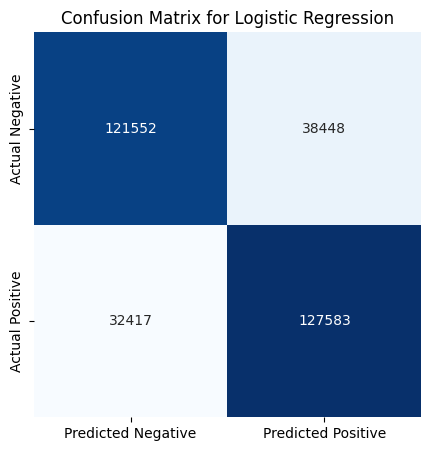


Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.79      0.76      0.77    160000
           1       0.77      0.80      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [ ]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, X_test_prediction)

# Plotting the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix for Logistic Regression')
plt.show()
print("\nClassification Report (Test Data):")
print(classification_report(Y_test, X_test_prediction))